# Data Science June Minor Project - ABHINAV UPADHYAY

### Problem statement: 
- Create a classification model to predict the gender (male or female) based on different acoustic parameters

### Context: 
- This database was created to identify a voice as male or female, based upon acoustic properties of the voice and speech. The dataset consists of 3,168 recorded voice samples, collected from male and female speakers. The voice samples are pre processed by acoustic analysis in R using the seewave and tuneR packages, with an analyzed frequency range of 0hz-280hz (human vocal range).

### Column Description:
- meanfreq: mean frequency (in kHz)
- sd: standard deviation of frequency
- median: median frequency (in kHz)
- Q25: first quantile (in kHz)
- Q75: third quantile (in kHz)
- IQR: interquantile range (in kHz)
- skew: skewness (see note in specprop description)
- kurt: kurtosis (see note in specprop description)
- sp.ent: spectral entropy
- sfm: spectral flatness
- mode: mode frequency
- centroid: frequency centroid (see specprop)
- peakf: peak frequency (frequency with highest energy)
- meanfun: average of fundamental frequency measured across acoustic signal
- minfun: minimum fundamental frequency measured across acoustic signal
- maxfun: maximum fundamental frequency measured across acoustic signal
- meandom: average of dominant frequency measured across acoustic signal
- mindom: minimum of dominant frequency measured across acoustic signal
- maxdom: maximum of dominant frequency measured across acoustic signal
- dfrange: range of dominant frequency measured across acoustic signal
- modindx: modulation index. Calculated as the accumulated absolute difference between adjacent measurements of fundamental frequencies divided by the frequency range
- label: male or female

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# load the data
df = pd.read_csv('voice.csv')
print(df.shape)
df.head()

(3168, 21)


,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


### Steps to consider:
#### 1) Remove/handle null values (if any)

In [3]:
df.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

#### 2) Depict percentage distribution of label on a pie chart

In [4]:
df['label'].value_counts()

male      1584
female    1584
Name: label, dtype: int64

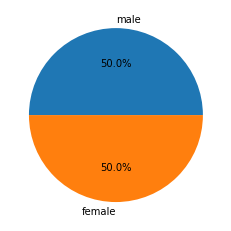

In [5]:
plt.pie(df['label'].value_counts(), labels=df.label.unique(), autopct='%1.1f%%')
plt.show()

In [6]:
# separate the cloumns as x and y
x = df.iloc[:, :-1]
y = df.iloc[:, -1]
print("x_shape : ",x.shape)
print("y_shape : ",y.shape)

x_shape :  (3168, 20)
y_shape :  (3168,)


In [7]:
x.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274


In [8]:
y.head()

0    male
1    male
2    male
3    male
4    male
Name: label, dtype: object

#### 3) Considering all the features as independent feature and label as dependent feature, split the dataset training and testing data with test size=20%

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)
print("x_train_shape : ",x_train.shape)
print("x_test_shape : ",x_test.shape)
print("y_train_shape : ",y_train.shape)
print("y_test_shape : ",y_test.shape)

x_train_shape :  (2534, 20)
x_test_shape :  (634, 20)
y_train_shape :  (2534,)
y_test_shape :  (634,)


In [11]:
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)  

In [12]:
def get_result(model, x_train=x_train, x_test=x_test, y_train=y_train, y_test=y_test):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print("First 5 predicted values : ", y_pred[:5])
    print("Last 5 predicted values : ", y_pred[-5:])
    from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    print("Confusion Matrix : \n", cm)
    print("Classification Report \n: ", cr)
    print("Accuracy Score : ", accuracy_score(y_test,y_pred))
    return accuracy_score(y_test,y_pred)

#### 4) Apply the following classifier models on training dataset and generate predictions for the test dataset
    a. Decision Tree Classifier
    b. Random Forest Classifier
    c. KNN Classifier
    d. Logistic Regression
    e. SVM Classifier
#### 5) Also generate confusion_matrix and classification report for each model generated in step 4.

### a. Decision Tree Classifier

In [13]:
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier()
acc_score1 = get_result(model1, x_train, x_test, y_train, y_test)

First 5 predicted values :  ['male' 'male' 'male' 'male' 'female']
Last 5 predicted values :  ['male' 'male' 'female' 'female' 'male']
Confusion Matrix : 
 [[294  17]
 [  8 315]]
Classification Report 
:                precision    recall  f1-score   support

      female       0.97      0.95      0.96       311
        male       0.95      0.98      0.96       323

    accuracy                           0.96       634
   macro avg       0.96      0.96      0.96       634
weighted avg       0.96      0.96      0.96       634

Accuracy Score :  0.9605678233438486


### b. Random Forest Classifier

In [14]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier()
acc_score2 = get_result(model2, x_train, x_test, y_train, y_test)

First 5 predicted values :  ['male' 'male' 'male' 'male' 'female']
Last 5 predicted values :  ['male' 'male' 'female' 'female' 'male']
Confusion Matrix : 
 [[305   6]
 [  5 318]]
Classification Report 
:                precision    recall  f1-score   support

      female       0.98      0.98      0.98       311
        male       0.98      0.98      0.98       323

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634

Accuracy Score :  0.9826498422712934


### c. KNN Classifier

In [15]:
from sklearn.neighbors import KNeighborsClassifier
model3 = KNeighborsClassifier(n_neighbors=9)
acc_score3 = get_result(model3, x_train, x_test, y_train, y_test)

First 5 predicted values :  ['male' 'male' 'male' 'male' 'female']
Last 5 predicted values :  ['male' 'male' 'female' 'female' 'male']
Confusion Matrix : 
 [[298  13]
 [  6 317]]
Classification Report 
:                precision    recall  f1-score   support

      female       0.98      0.96      0.97       311
        male       0.96      0.98      0.97       323

    accuracy                           0.97       634
   macro avg       0.97      0.97      0.97       634
weighted avg       0.97      0.97      0.97       634

Accuracy Score :  0.9700315457413249


### d. Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression
model4 = LogisticRegression()
acc_score4 = get_result(model4, x_train, x_test, y_train, y_test)

First 5 predicted values :  ['male' 'male' 'male' 'male' 'female']
Last 5 predicted values :  ['male' 'male' 'female' 'female' 'male']
Confusion Matrix : 
 [[298  13]
 [  5 318]]
Classification Report 
:                precision    recall  f1-score   support

      female       0.98      0.96      0.97       311
        male       0.96      0.98      0.97       323

    accuracy                           0.97       634
   macro avg       0.97      0.97      0.97       634
weighted avg       0.97      0.97      0.97       634

Accuracy Score :  0.9716088328075709


### e. SVM Classifier

In [17]:
from sklearn.svm import SVC
model5 = SVC()
acc_score5 = get_result(model5, x_train, x_test, y_train, y_test)

First 5 predicted values :  ['male' 'male' 'male' 'male' 'female']
Last 5 predicted values :  ['male' 'male' 'female' 'female' 'male']
Confusion Matrix : 
 [[304   7]
 [  4 319]]
Classification Report 
:                precision    recall  f1-score   support

      female       0.99      0.98      0.98       311
        male       0.98      0.99      0.98       323

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634

Accuracy Score :  0.9826498422712934


#### 6) Report the model with the best accuracy

- ``RandomForestClassifier``

In [18]:
print("Accuracy Score = ", acc_score2)

Accuracy Score =  0.9826498422712934


- ``SupportVectorMachine``

In [19]:
print("Accuracy Score = ", acc_score5)

Accuracy Score =  0.9826498422712934
